# **Project - Artificial Neural Networks: Street View Housing Number Digit Recognition**

# Marks: 30

Welcome to the project on classification using Artificial Neural Networks. We will work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a feed forward neural network model that can identify the digits in the images. 

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing libraries**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [22]:
print(tf.__version__)

2.7.0


## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [23]:
import h5py

# open the file as read only
# user can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

# load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [24]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

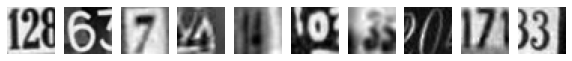

Label for each image above: [2 6 7 4 4 0 3 0 7 3]


In [25]:
# visualize the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.axis('off')

plt.show()
print('Label for each image above: %s' % (y_train[0:10]))

## **Data preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to flatten them. Figure out the required shape
- Normalise the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [26]:
# print the shape of the first train images
# figure out the shape of the train images

print("Figure Shape:", X_train[0].shape)
print('\n----X_train[0]----\n', X_train[0])
print()
print("First image:\n", X_train[0])

Figure Shape: (32, 32)

----X_train[0]----
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [27]:
# reshape the 2D image data into a 1D array to flatten them.

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

#### **Question 1: Normalize the train and test data (2 Marks)**

In [28]:
# normalize inputs from 0-255 to 0-1
# pixel values range from 0-255
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [29]:
# print the new shape 
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [30]:
# one hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
y_test

# examine the shapes of the datasets 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 1024)
(42000, 10)
(18000, 1024)
(18000, 10)


**Observations**
- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now, we have done the data preprocessing, let's build an ANN model.

In [31]:
# fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with **64 nodes and relu activation** and the input shape which is used above
 - Second hidden layer with **32 nodes and relu activation**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model.
- Call the function and store the model in a new variable 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Question 2: Build and train a ANN model as per the above mentioned architecture (10 Marks)**

In [32]:
from tensorflow.python.keras.engine import input_layer
from tensorflow.python.keras import activations
from matplotlib.cbook import flatten
from tensorflow.python.ops.gen_nn_ops import Conv2D
from h5py._hl import filters
from tensorflow.python.keras.backend import conv2d
# import losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

from tensorflow.keras.models import Sequential

# define the function
def nn_model_1():
    model = Sequential(
    [tf.keras.layers.Flatten(input_shape=(1024,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')])

    # declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    # compile the model
    model.compile(optimizer=adam, loss='categorical_crossentropy',
                         metrics=['accuracy'])

    
    return model
    

In [33]:
# build the model
model_1 = nn_model_1()

In [34]:
# print the summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


**Observations**
- There are 68,010 trainable parameters in the model.
- There are no parameters in the model that do not learn through model training.
- The flatten model has flattened each image into a size of 32*32=1024.
- Each image in the form of 1024 nodes is the input for the 'dense_1' layer. Each node of the previous layer is connected with each node of the current layer. Also, each connection has one weight to learn and each node has one bias. So, the total number of parameters are (1024*64)+64 = 65,600.
- The last - 'dense_1' have (64*32)+32 = 2080 parameters.

In [35]:
# fit on the train data with a validation split of 0.2, 
# batch size = 128, verbose = 1, and 20 epochs. 
# store the model building history to use later for visualization.

history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2,
                              verbose=1, epochs=20, batch_size=128)


Epoch 1/20
263/263 [==============================] - 4s 8ms/step - loss: 2.2993 - accuracy: 0.1179 - val_loss: 2.2594 - val_accuracy: 0.1463
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1130 - accuracy: 0.2276 - val_loss: 1.9376 - val_accuracy: 0.3279
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 1.7953 - accuracy: 0.3824 - val_loss: 1.6499 - val_accuracy: 0.4551
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 1.5726 - accuracy: 0.4828 - val_loss: 1.4957 - val_accuracy: 0.5094
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4604 - accuracy: 0.5268 - val_loss: 1.4267 - val_accuracy: 0.5357
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4008 - accuracy: 0.5503 - val_loss: 1.3652 - val_accuracy: 0.5613
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3588 - accuracy: 0.5682 - val_loss: 1.3282 - val_accuracy: 0.5799
Epoch 

**Observations**
- Accuracy appears to increase with the increase in the number of epochs. 

### **Plotting the validation and training accuracies**

#### **Question 3: Write your observations on the below plot (2 Marks)**

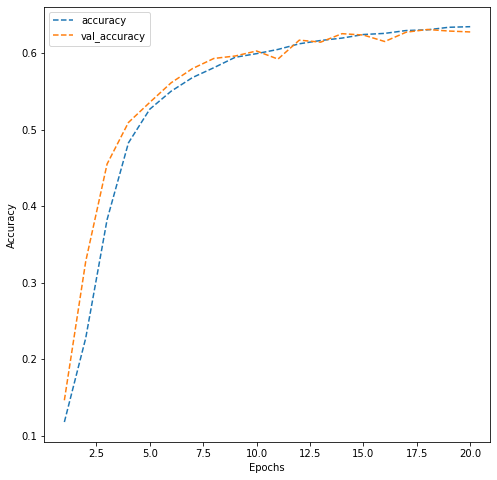

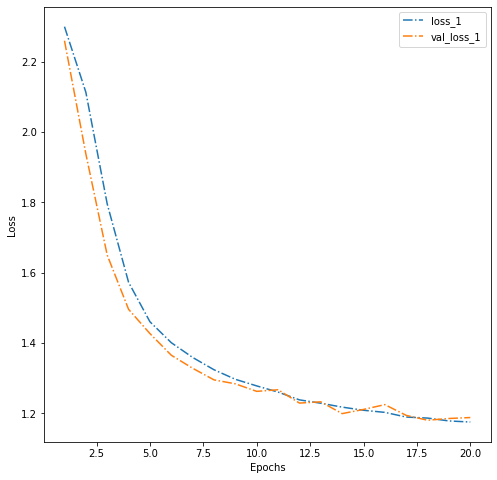

In [36]:
# plot the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# plot the losses 
plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['loss'], ls = '-.', label = 'loss_1')
plt.plot(list_ep,dict_hist['val_loss'], ls = '-.', label = 'val_loss_1')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- With each added epoch, both the accuracy and the validation accuracy increase. 
- For 20 epochs, the model is seeing an accuracy of about ~68% for the training data and ~67.25% for the validation data. 
- Accuracy on the training data sees a steady increase, while the validation accuracy after ten epochs starts to experience peaks.
- This could indicate that the model needs an adjustment in the batch size and the loss function(s). Overfitting is evident past the tenth epoch, through the validation accuracy oscillation(s). 
- Solution: check the training history and possibly add more data to train the model. Additionally, the model could benefit from more regularization, data augmentation, reduction of hidden layers, and/or a natural increase in data sample(s) versus synthetic sampling. 



Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [37]:
# clear the backend
from tensorflow.keras import backend
backend.clear_session()

In [38]:
# fix the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First hidden layer with **256 nodes and relu activation**
 - Second hidden layer with **128 nodes and relu activation**
 - Add the **Dropout layer with rate equal to 0.2**
 - Third hidden layer with **64 nodes and relu activation**
 - Fourth hidden layer with **64 nodes and relu activation**
 - Fifth hidden layer with **32 nodes and relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **softmax activation and number of nodes equal to the number of classes**
 -Compile the model with the **categorical_crossentropy loss, adam optimizer (learning_rate = 0.0005), and accuracy metric**. Do not fit the model here, just return the compiled model.
- Call the function and store the model in a new variable 
- Print the summary of the model
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Question 4: Build and train the new ANN model as per the above mentioned architecture (10 Marks)**

In [39]:
from tensorflow import keras
# import losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import layers

# define the function
def nn_model_2():
    model = tf.keras.Sequential()
    
    model.add(Dense(256, activation='relu', input_shape=(1024,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization()) 
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0005), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [40]:
# build the model
model_2 = nn_model_2()


In [41]:
# print the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [42]:
# fit the model
history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2,
                              verbose=1, epochs=30, batch_size=128)


Epoch 1/30
263/263 [==============================] - 4s 11ms/step - loss: 2.3475 - accuracy: 0.1018 - val_loss: 2.2903 - val_accuracy: 0.1244
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 2.1435 - accuracy: 0.1857 - val_loss: 2.0421 - val_accuracy: 0.2756
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 1.7642 - accuracy: 0.3826 - val_loss: 1.5526 - val_accuracy: 0.4861
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.4718 - accuracy: 0.5024 - val_loss: 1.4331 - val_accuracy: 0.5232
Epoch 5/30
263/263 [==============================] - 3s 10ms/step - loss: 1.3157 - accuracy: 0.5648 - val_loss: 1.3021 - val_accuracy: 0.5812
Epoch 6/30
263/263 [==============================] - 3s 10ms/step - loss: 1.2174 - accuracy: 0.6085 - val_loss: 1.1028 - val_accuracy: 0.6511
Epoch 7/30
263/263 [==============================] - 3s 10ms/step - loss: 1.1441 - accuracy: 0.6333 - val_loss: 1.0375 - val_accuracy: 0.6701

### **Plotting the validation and training accuracies**

#### **Question 5: Write your observations on the below plot (2 Marks)**

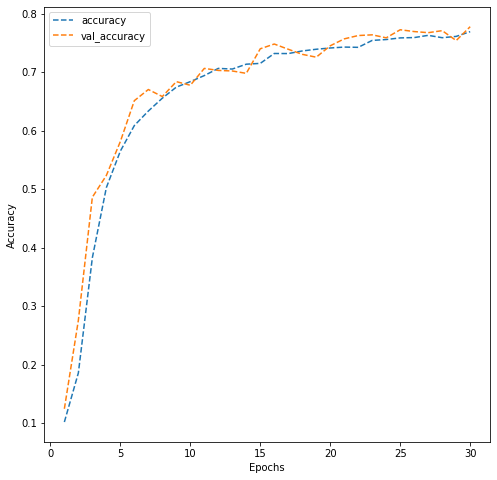

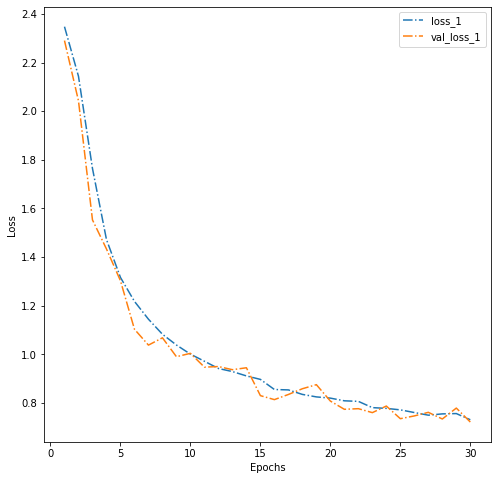

In [43]:
# plot the accuracies
dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# plot the losses 
plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['loss'], ls = '-.', label = 'loss_1')
plt.plot(list_ep,dict_hist['val_loss'], ls = '-.', label = 'val_loss_1')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:**
- With 30 epochs, the validation accuracy and true accuracy closely mirror each other for the first ten epochs, then the validation accuracy resembles peaks. There are some inconsistencies, but the gap between the actual and validated accuracy is smaller from the previous model_1 training. 
- The peaks are more evident for this model_2 validation accuracy. Again, this is possible because the model needs an adjustment in the batch size and the loss function(s). Overfitting is evident past the tenth epoch.  
- The model needs more data. It could also benefit from more regularization, data augmentation, reduction of hidden layers, and or a natural increase in data sample(s) (versus synthetic sampling). 
- The model is not learning well. 
- A similar behavior exists for losses. 

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

In [44]:
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [45]:
# convert each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Question 6: Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results (4 Marks)**

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1814
           1       0.78      0.80      0.79      1828
           2       0.77      0.80      0.78      1803
           3       0.69      0.77      0.73      1719
           4       0.76      0.85      0.81      1812
           5       0.78      0.71      0.74      1768
           6       0.84      0.71      0.77      1832
           7       0.78      0.83      0.80      1808
           8       0.71      0.75      0.73      1812
           9       0.78      0.75      0.77      1804

    accuracy                           0.77     18000
   macro avg       0.78      0.77      0.77     18000
weighted avg       0.78      0.77      0.77     18000



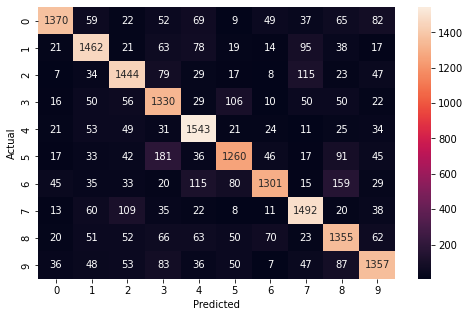

In [46]:
# import required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# print the classification report
print(classification_report(y_test, test_pred))

# plot the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred) 
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:**
- Class 5 and Class 6 have a poor recall rate, and correctly classified the images about 71% of the total sample. 
- Class 4 had the highest recall rate, but not the highest precision rate, which was Class 0. 
- The overall accuracy of this model is 78% which is not great. 
- There is overfit in the modeling process. 
- It is recommended that the model apply more regularization, dropout, batch normalization, and data augmentation to handle the overfitting. 
- Additionally, a natural increase in data sample(s) (versus synthetic sampling) might also aid in overfitting. 
- The NN model may not be an optimal solution for digit recognition. It may be worth investing in trying a differing model (CNN etc.)